# Building an agent-based model in Python
This notebook contains all the code you need to build your own agent-based model (ABM) in Python.

Each code "chunk" contains code corresponding to different parts of the model. The code is mostly complete, but some lines are missing. Below each section there are some possible options for code that can go in the missing sections, which you will need to correctly select so that the code can run. (Or if you are already familiar with Python, you can try writing some of the lines yourself.)

<font color='blue'> Extra help for first time Python users will be in blue. You may find these reminders helpful if you've never used Python before. Feel free to ignore them if you are feeling comfortable with the material!</font> 

<font color='red'> Tasks that need to be completed for the code to run are indicated in red. </font> 


Before we start, we need to load some packages that will give us some predefined functions that we will need to produce the model.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from graphing import graph_network

# Parameters

We start with the boring stuff first to give you a flavour of what we are trying to simulate. In this section, we define the parameters that will be used to characterise the simulation.

We first define some of the parameters for the disease. `p_inf` will be the probability of an infectious individual infecting a susceptible individual in an interaction.

`incubation_period_avg` gives the average incubation period (duh) for the infection. This will later be used as a parameter in the probability distribution for the incubation period. 

`recover_period_avg` gives the average period for recovery from the infection (duh again). Like with `incubation_period_avg` will be used as a parameter in the probability distribution for the incubation period.

In [9]:
p_inf = 0.05
incubation_period_avg=3
recovery_period_avg=6

These will be the parameters for setting up individuals, locations and time-scale of the simulation.

`N` is the number of individuals to be generated at the start of the simulation.

`N_Households` and `N_offices` will be the number of households and offices created respectively.

`number_of_days` will be the number of days that the simulation will run.

In [ ]:
N = 2_500
N_Households = 400
N_offices = 200 
number_of_days=120

## Individual Class
In this section, we create a class representing an individual in the model.

In [ ]:
class individual:
    def __init__(self, Id,  age, home_id, work_id, status):
        self.id = Id  #individual id
        self.age = age 
        self.status = status
        self.home_id = home_id #each individual has a home and a work id
        self.work_id = work_id  
        self.infectiontime = np.inf
        # the infection time is set to infinity before an individual is infected by default
        # this is just a "filler" value since susceptible people have no infectiontime yet
        self.recovery = np.inf
        
        # ------------ TASK 1 ------------
        # insert code here
        # --------------------------------
    def whereabouts(self, time_window):
        # ------------ TASK 2 ------------
        # insert code here
        # --------------------------------
            self.location=self.home_id
        else: # individuals change their location depending on the time of day
            if time_window==1:  # 0 (from 00 to 8), 1 (from 9 to 17), 2(18 to 24)
                self.location=self.work_id
            else:
                self.location=self.home_id
                
    def infection(self,d=0):  #this updates the person infection process
        if self.status=="S":
            # randomly generate the time the individual is in the exposed state
            self.infectiontime = d+1+np.random.exponential(scale=incubation_period_avg)
            # ------------ TASK 3 . A ------------
            # Set disease status to exposed
            
            # ------------------------------------
            self.place_of_infection = self.location # record the person's place of infection
        elif self.status=="E" and d>=self.infectiontime:
            # ------------ TASK 3 . B ------------
            # Set disease status to infected

            # ------------------------------------
            # generates a random recovery time for the patient 
            self.recovery=d+1+np.random.exponential(scale=recovery_period_avg) 
        #recovery   
        elif self.status=="I" and d>=self.recovery:
            # ------------ TASK 3 . A ------------
            # Set disease status to recovered
            
            # ------------------------------------

<font color='blue'>
Parts of the code beginning with "#" are comments and do not affect how the main body of the code runs.
</font>

The `_init_` section gives some of the variables that are associated with an instance of this class. `(self, Id,  age, home_id, work_id, status)` are the variables that must be provided every time you make a new individual (a.k.a. instanciate an individual). Other variables like `infectiontime` and `location` are variables that can be associated to an individual, but they do not have to be assigned straight away.



<font color='red'> **TASK 1:** Set the starting location of each individual to be their home. Copy the correct line of code into the definition of `individual`, or write the code yourself.
</font>


In [3]:
# Option 1
self.location=self.home
# Option 2
self.location=self.home_id
# Option 3
self.location=home_id


The next definitions, `whereabouts` and `infection` are functions that can be applied on an instanciation of an individual.

`whereabouts` takes the arguments `self` and `time_window`, indicating that apart from the function using the individual itself, it also requires an argument `time_window` to work.

For our model, we will make the assumption that everyone over the age of 65 and anyone under the age of 18 stays at home. (This is not a particularly realistic assumption, but it keeps the model simple for now.)


<font color='red'> **TASK 2:** Insert a conditional statement that assigns the `location` at any time to be the `home` if the individual is over 65 or if they are under 18.
</font>

In [ ]:
# Option 1
if self.age<65 or self.age<18:
# Option 2
if self.age>65 and self.age<18:
# Option 3
if self.age>65 or self.age<18:

`infection` updates the person's infection process. For the arguments we have `self` and `d`, which is the number of days that have elapsed in the model. `d` has a default value of 0.

Recall the SEIR model.

If the individual is susceptible (`self.status==S`), then this function will generate a random time that they will be exposed but not infectious using the exponential distribution. The individual's status is then set to exposed. We also record the place where the person became infected for when we want to analyse the model results later and determine where the majority of transmissions might occur. 

If the person is exposed (`self.status==E`), AND the number of the day `d` is greater than or equal to the time where they are supposed to become infected, then the individual's status is set to infected. The time at which they recover is then generated using an exponential distribution.

If the person is infected (`self.status==I`), and the number of of the day `d` is greater than or equal to the time where they are supposed to recover, then the individual's status is set to recovered.

<font color='red'> **TASK 3:** For each of the conditions in `infection`, add lines of code assigning the new disease state to the individual.
</font>

Check your answers were correct by running the following code. If the any errors are raised, please go back and review your code.

In [ ]:
individual1 = individual(0,20,1,2,"S")
individual2 = individual(0,5,1,2,"S")
individual3 = individual(0,100,1,2,"S")

assert individual1.location == 1, "Check answer to Task 1"

individual1.whereabouts(1)
assert individual1.location == 2, "Check answer to Task 2"
individual2.whereabouts(1)
assert individual2.location == 1, "Check answer to Task 2"
individual3.whereabouts(1)
assert individual3.location == 1, "Check answer to Task 2"

assert individual1.status == "S", "Check answer to Task 3"
individual1.infection()
assert individual1.status == "E", "Check answer to Task 3"
individual1.infection(d = individual1.infectiontime)
assert individual1.status == "I", "Check answer to Task 3"
individual1.infection(d = individual1.recovery)
assert individual1.status == "R", "Check answer to Task 3"

print("All checks passed!")

## Simulation Setup

We're now ready to setup the simulation!

### Generating Characteristics for the Population

First we will be generating an array containing the ages of individuals in the population at random. The function `np.random.choice` chooses a sample of size `size` from a list. Although this does not represent a realistic age distribution in a population, we will randomly set each individual in this simulation to an age between 0 and 80. `replace` here means that each possible age may be selected multiple times.

In [ ]:
age =np.random.choice(range(80), size=N, replace=True)

We want to randomly assign each individual in our model to a household. We can index each of the households in our model with a number between 0 and `N_Households`.

<font color='red'> **TASK 4:** Adapt the code in the previous snippet to define a variable `households` that is an array containing the indices of the household of each of the individuals in the model.
</font>

In [ ]:
households = # TASK 4

Check your answer. Please review your code if there are any errors.

In [ ]:
assert len(households) == N, "There should be exactly N households for each of the N people."
assert max(households) <= N_Households and min(households) >= 0, "There shouldn't be any households outside of the range of 0 and N_households."
assert len(np.unique(households)) > 1, "Check that you are choosing from a range of values."

print("All checks passed!")

We also want to randomly asign each individual in the model to an workplace. The offices have indices with numbers between `N_Households` and `N_Households + N_offices`.

In [ ]:
offices = np.random.choice(range(N_Households, N_Households+N_offices), size=N, replace=True)

### Initialising a population

Now let's create the people in our simulation. We create a list called `people` and add each person that will be in the model to this list.

<font color='red'> **TASK 5:** Choose the correct code for creating an individual with:
- ID = `i`
- age = `i`th element of the list `age`
- household = `i`th element of the list `households`
- office = `i`th element of the list `offices`
- state = susceptible

Add this to the for loop to add N individuals to the list `people`.
</font>

In [ ]:
# Option 1
individual(i,age[i],households[i],offices[i],"S")
# Option 2
individual(i,households[i],age[i],offices[i],"S")
# Option 3
individual(i,age[i],households[i],offices[i],"I")

In [ ]:
people = []
for i in range(N):
    people.append(
        # ----------- TASK 5 -------------
        
        # --------------------------------
    )

Check your answer. Please review your code if there are any errors.

In [ ]:
check_age = np.array([person.age for person in people])
assert np.array_equal(check_age,age), "Check that the age of each person was filled in correctly."

check_household = np.array([person.home_id for person in people])
assert np.array_equal(check_household,households), "Check that the household of each person was filled in correctly."

check_office = np.array([person.work_id for person in people])
assert np.array_equal(check_office,offices), "Check that the workplace of each person was filled in correctly."

check_status = np.array([person.status for person in people])
assert np.array_equal(check_status,np.array(["S" for i in range(N)])), "Check that each person is starting as susceptible."

For an infection to start in the first place, we need to start with some infectious period. Let us start with 10 infectious people.

<font color='red'> **TASK 6:**
Using the for loop below, set the first 10 indexed people to infected and on the 0th day of infection. Set the recovery time to be a random time like when we defined the individual class (hint: check for how the recovery time is generated in the function `infection` that we defined for the `individual` class).
</font>

In [ ]:
for i in range(10):
    # ----------- TASK 6 -----------
    people[i].status=
    people[i].infectiontime=1+
    people[i].recovery = 1+
    # ------------------------------

Check your answer. Please review your code if there are any errors.

In [ ]:
for i in range(10):
    assert people[i].status == "I", "Check that you have set the correct disease status for the first 10 people."
    assert people[i].infectiontime != np.inf and people[i].infectiontime > 0 , "Check that you havfe added the length of the infection period for each of the initial infectious individuals."
    assert people[i].recovery != np.inf and people[i].recovery > 0, "Check that you have added the length of the recovery period for each of the initial infectious individuals."

for i in range(10,N):
    assert people[i].status == "S", "Check that only the first 10 people were infected."
    assert people[i].infectiontime == np.inf, "Check that only the first 10 people were infected."
    assert people[i].recovery == np.inf, "Check that only the first 10 people were infected."

print("All checks passed!")

To visualise our model, we will keep track of which people in the model are infected and the different locations in the model.

In [ ]:
infected_people = [person for person in people if(person.status=="I") ]
unique_locations = np.unique(np.array([person.location for person in infected_people]))

In the diagram below, houses are represented by an orange node and offices with a blue node. Each connection is the connection between a house and an office due to an individual moving between them. Red nodes and connections indicate infected individuals.

In [ ]:
graph_network(households, offices, infected_people, unique_locations, N, N_Households, N_offices)

Finally (I promise), we would like to keep a track for later analysis of the number of people in each compartment every day. We also want to know the locations people typically get infected, which would help us answer questions about what disease control strategies might be most effective.

In [ ]:
infected_per_day = []
susceptible_per_day = []
exposed_per_day=[]
recovered_per_day=[]

infected_at_work=np.zeros(number_of_days)
infected_at_home=np.zeros(number_of_days)

## Running the simulation!
In this section, we put together all the previous elements constructed to build the full simulation. 

As a reminder, this will be the order of events for each time point in the simulation. There are three time points in the day representing morning, during the day and night time.

1. Check the location of infected people.
2. For each susceptible person, we check if they are in the same location as an infected person.
3. If they are, They will become infected with some probability. (We record where they became infected for later analysis.)

At the end of each day we record number of people in each compartment.

In [ ]:
for d in range(number_of_days):
    for t in range(3):
        # First we set the whereabouts for all individuals
        for person in people:
            person.whereabouts(t)
        # ----------- TASK 7 -----------
        infected_people = # insert code here
        # ------------------------------

        # ----------- TASK 8 -----------
        unique_locations = np.array([person.location for person in infected_people]) # modify this line
        # ------------------------------
           
        #count where people get infected
        infections_at_home=0
        infections_at_work=0
        for person in people:         
            # now we need to find all individuals who share place with infected
            # ----------- ΤASK 9 ------------
            if (
                # insert answer here
            ):
            # -------------------------------
                # this simulates the person becoming infected with a probability p_inf
                random_numbers = np.random.uniform()<=p_inf 
                
                if (random_numbers): 
                    person.infection(d)
                    # Now we record where the person became infected
                    if person.location in households:
                        infections_at_home+=1
                    else:
                        infections_at_work+=1
            # ---------- TASK 10 -----------
            if (person.status!='S'):
                # insert code here
            # ------------------------------
        # Adding the number of people infected at work and at home for the day to the list  
        infected_at_work[d] += infections_at_work
        infected_at_home[d] += infections_at_home
    
    # ---------- TASK 11 -----------
    infected_per_day.append(
        # insert code here
    )
    susceptible_per_day.append(
        # insert code here
    )    
    exposed_per_day.append(
        # insert code here
    )            
    recovered_per_day.append(
        # insert code here
    )            
    # ------------------------------

<font color='red'> **TASK 7:**
Create a list of infected people.
</font>

In [ ]:
# Option 1
[person for person in people if(person.status="I")]
# Option 2
[people.status=="I"]
# Option 3
[person for person in people if(person.status=="I")]

<font color='red'> **TASK 8:**
Use the function `np.unique` to create an array of unique locations of infected people.
</font>

<font color='red'> **TASK 9:**
Rearrange the code fragments below to create a condition that the person needs to be in the same location as an infectious person and susceptible to determine if they are to become infected
</font>

In [ ]:
person.status=="S"
unique_locations
person.location
in
and

<font color='red'> **TASK 10:**
If the person is not susceptible, insert the correct line so that their infection progresses.
</font>

In [ ]:
# Option 1
person.infection(d)
# Option 2
infection(d)
# Option 3
infection(d,person)

<font color='red'> **TASK 11:**
Arrange the code fragments to create an expression that counts the number of susceptible/exposed/infectious/recovered people for that day. Add this to the code so we have a record of the number of people in each compartment for that day.
</font>

In [ ]:
sum( )
[ ] 
for person in people
person.status== 

Now that you have filled in the missing code, you are ready to run the model!

## Results
In this section we plot the results.

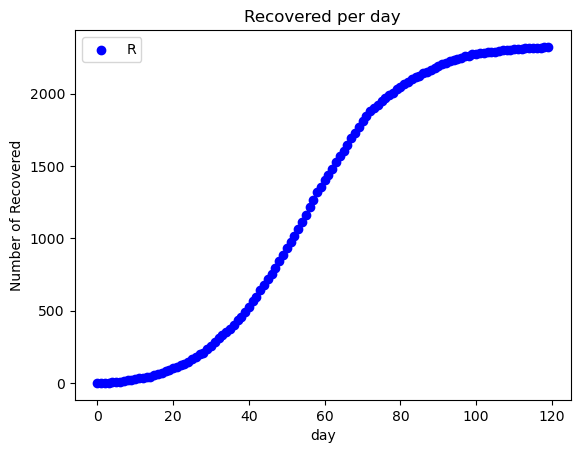

In [ ]:
plt.scatter(range(number_of_days),recovered_per_day, color='grey', label='R')
plt.legend()
plt.ylabel("Number of Recovered")
plt.xlabel("day")
plt.title("Recovered per day")

plt.show()

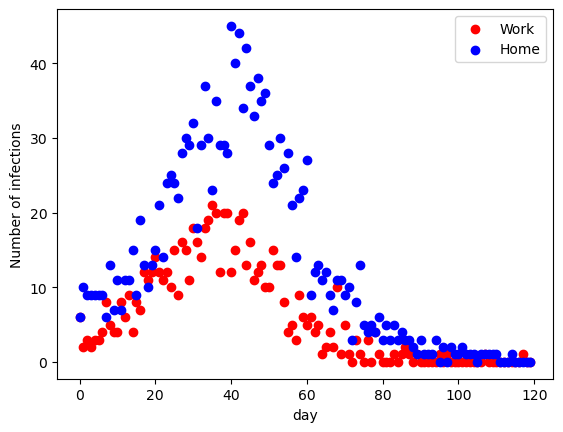

In [ ]:

plt.scatter(range(number_of_days),infected_at_work, color='r', label="Work")
plt.scatter(range(number_of_days),infected_at_home, color='b', label="Home")
plt.xlabel("day")
plt.ylabel("Number of infections")
plt.title("Infections per day")
plt.legend()

plt.show()

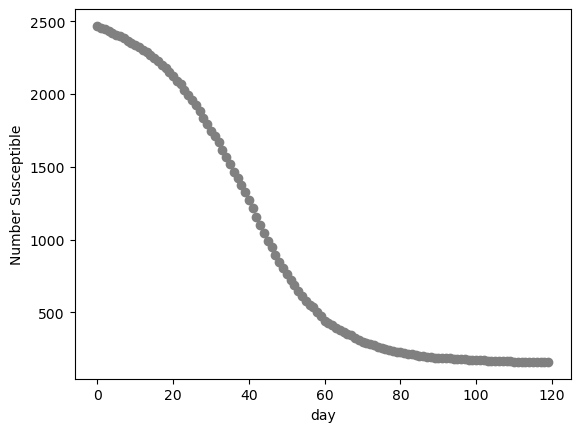

In [ ]:

plt.scatter(range(number_of_days),susceptible_per_day, color='green')
plt.xlabel("day")
plt.ylabel("Number Susceptible")
plt.title("Susceptible per day")

plt.show()

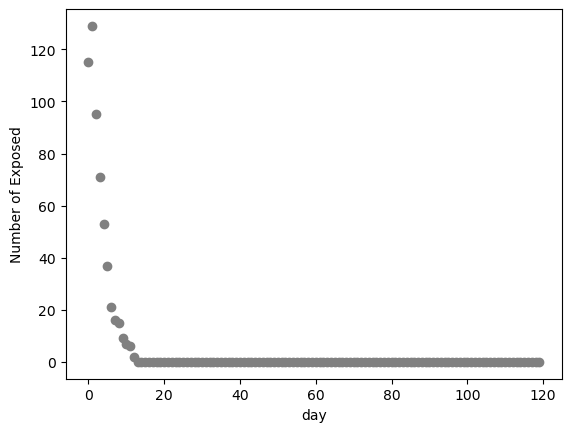

In [ ]:

plt.scatter(range(number_of_days),exposed_per_day, color='yellow')
plt.xlabel("day")
plt.ylabel("Number of Exposed")
plt.title("Exposed per day")

plt.show()

<font color='red'> **Bonus:**
Change some of the parameters in your model. How does this affect the results?
</font>